In [5]:
import torch
import glob
from pathlib import Path
import os
import numpy as np
from sklearn.neighbors import NearestNeighbors as NN
import glob
import pandas as pd
import ipdb

In [6]:
from torch_geometric.transforms import Compose
from torch_points3d.core.data_transform import MinPoints,XYZFeature, AddFeatsByKeys, GridSampling3D
from torch_points3d.applications.pretrained_api import PretainedRegistry
from torch_geometric.data import Batch,Dataset, Data ,DataLoader


In [7]:
## transformer
pos_z = [ "pos_z" ]
list_add_to_x = [ True ]
delete_feats = [ True ]
lparams = ['512']

first_subsampling = 0.02

transform_test = Compose([MinPoints(512),
                     XYZFeature(add_x=False, add_y=False, add_z= True),
                     AddFeatsByKeys(list_add_to_x=list_add_to_x, feat_names= pos_z,delete_feats=delete_feats),
                     GridSampling3D(mode='last', size=first_subsampling, quantize_coords=True)])

In [8]:
from sklearn.neighbors import BallTree, KDTree
import numpy as np
# import time
def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""
    # src : whole gt points in a file 
    tree = KDTree(candidates, leaf_size=20, metric='euclidean')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    closest = np.squeeze(indices)
    closest_dist = distances

    # Return indices and distances

    return closest

In [9]:
#models = torch.load("outputs/2022-02-16/11-00-40/PointNet_old.pt")

In [10]:
## powline model seg
model_folder = "2022-05-17/14-22-25/"
root_path = "/maps/projects/dereeco/people/dmn774/git/seg/torch-3dpoints/"
pl_models_path = root_path+ "outputs/" + model_folder + "SEUNet18" 

# model_test = "2022-05-17/14-22-25/"
# model_test = "2022-05-17/14-55-54/"
# pl_models_path = root_path + "outputs/" + model_test + "SEUNet18"
model_pl = PretainedRegistry.from_file(pl_models_path).cuda()

loading processed train split
Total of 1815 samples in train set.
loading processed val split
Total of 500 samples in val set.
loading processed test split
Total of 500 samples in test set.


In [11]:
model_pl

Minkowski_Baseline_Model(
  (model): SEUNet18(
    (act_fn): MinkowskiReLU()
    (conv1): MinkowskiConvolution(in=1, out=64, kernel_size=[7, 7, 7], stride=[1, 1, 1], dilation=[1, 1, 1])
    (bn1): MinkowskiBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (pool): MinkowskiMaxPooling(kernel_size=[2, 2, 2], stride=[2, 2, 2], dilation=[1, 1, 1])
    (blocks): Sequential(
      (0): Sequential(
        (0): SEBasicBlock(
          (downsampler): Sequential()
          (conv1): MinkowskiConvolution(in=64, out=64, kernel_size=[3, 3, 3], stride=[1, 1, 1], dilation=[1, 1, 1])
          (norm1): MinkowskiBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): MinkowskiConvolution(in=64, out=64, kernel_size=[3, 3, 3], stride=[1, 1, 1], dilation=[1, 1, 1])
          (norm2): MinkowskiBatchNorm(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): MinkowskiReLU()
          (se): SELayer(
      

## Process with the original data

### read the original data

### tranform the data for the model input

In [18]:
## use the lib for the use

## Process with the normalize data

In [12]:
## load test pt with normalized

## load transform pt pre
# root_path = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU/Powerlines/denmark/processed/"
# root_path = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU/Powerlines/test_some/denmark/processed/"
data_root_path = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU/Powerlines/exp_2205/denmark/processed_new/"
test_fold = data_root_path + "test_0_(0.1, 0.1)/"
# pre_trans_path = root_path + "test_0_(0.05, 0.05)/stats.pt"
# test_fold = root_path + "test_0_(0.1, 0.1)/"
pre_trans_path = test_fold + "/stats.pt"
process_file_name_path = test_fold + "/processed_file_names.pt"
vis_out_folder = data_root_path + 'vis/'

pre_transform = torch.load(pre_trans_path)
process_file_name = torch.load(process_file_name_path)

In [26]:
pre_transform['room_coord_scale'], pre_transform
# xx = [file in glob.glob(test_fold + "*cloud*pt")]
pre_transform['room_names']
count_list = len(pre_transform['room_names'])
pre_transform

{'room_names': ['PUNKTSKY_00004_1km_6106_511',
  'PUNKTSKY_00005_1km_6084_519',
  'PUNKTSKY_00004_1km_6106_513',
  'PUNKTSKY_00005_1km_6083_507',
  'PUNKTSKY_00005_1km_6085_511'],
 'room_coord_min': [array([ 5.110e+05,  6.106e+06, -1.407e+01]),
  array([ 5.190e+05,  6.084e+06, -1.407e+01]),
  array([ 5.130e+05,  6.106e+06, -1.407e+01]),
  array([ 5.070e+05,  6.083e+06, -1.407e+01]),
  array([ 5.110e+05,  6.085e+06, -1.407e+01])],
 'room_coord_max': [array([5.1200e+05, 6.1070e+06, 1.2327e+02]),
  array([5.2000e+05, 6.0850e+06, 1.2327e+02]),
  array([5.1400e+05, 6.1070e+06, 1.2327e+02]),
  array([5.0800e+05, 6.0840e+06, 1.2327e+02]),
  array([5.1200e+05, 6.0860e+06, 1.2327e+02])],
 'room_coord_scale': [array([100.  , 100.  , 137.34]),
  array([100.  , 100.  , 137.34]),
  array([100.  , 100.  , 137.34]),
  array([100.  , 100.  , 137.34]),
  array([100.  , 100.  , 137.34])],
 'global_z': (-14.07, 123.27)}

In [27]:
count_list

5

In [13]:
## loop for every files
## delete files
count = 0
global_z = pre_transform['global_z']
# for i in range(count_list):
room_names = pre_transform['room_names']
room_coord_mins = pre_transform['room_coord_min']
room_coord_maxs = pre_transform['room_coord_max']
room_coord_scales = pre_transform['room_coord_scale']
count = 0
for file in glob.glob(test_fold + "1_cloud*pt"):
#     print(file)
    sample = os.path.join(test_fold, file)
    pt_data = torch.load(sample)
    room_index = pt_data['room_idx']
    room_name = room_names[room_index]
    vis_out = os.path.join(vis_out_folder, room_name)
#     ipdb.set_trace()

    room_coord_scale = room_coord_scales[room_index]
    pos_ = pt_data['points']
    pt_ori = pt_data['points'] * room_coord_scale + pt_data['coord_min']
    data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(pos_.shape[0]).long()))
    # data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(1).long()))
    data_s.y = torch.zeros(data_s.batch.shape).long()
    f = get_nearest(pos_, data_s.pos)

    with torch.no_grad():
        model_pl.set_input(data_s, "cuda")
        model_pl.forward(data_s)
    
    pre = model_pl.output.cpu().numpy()
    m= torch.nn.functional.softmax(torch.tensor(pre), dim=1)
    cla_pre = np.argmax(m, axis=1)
    pre_ori = np.arange(len(pos_))
    for i in pre_ori:
#         print(i)
        pre_ori[i] = cla_pre[f[i]]
    combine_pre = np.column_stack((pt_ori, pre_ori.T))
#     import ipdb;ipdb.set_trace()
    vis_out = vis_out_folder + room_name +'pre.txt'
    if os.path.exists(vis_out):
        file_save = open(vis_out, 'a')
    else:
        file_save = open(vis_out, 'w')

    file_save = open(vis_out_folder + room_name +'pre.txt', 'a')
    np.savetxt(file_save, combine_pre, fmt = '%1.5f')
#     file_save.write("\n")    
#     break
print("save finished")

AttributeError: 'int' object has no attribute 'unsqueeze'

### Simple vis

In [48]:
## read path
vis_out_folder
pred_path = os.path.join(vis_out_folder, "PUNKTSKY_00005_1km_6084_519pre.txt")
pred_data = pd.read_csv(pred_path, sep=" ", header=None).values
pred_data, pred_data.shape

(array([[5.11709580e+05, 6.08579572e+06, 2.45800000e+01, 0.00000000e+00],
        [5.11709290e+05, 6.08579572e+06, 2.46000000e+01, 0.00000000e+00],
        [5.11709000e+05, 6.08579572e+06, 2.45900000e+01, 0.00000000e+00],
        ...,
        [5.11835170e+05, 6.08578718e+06, 2.46900000e+01, 0.00000000e+00],
        [5.11834900e+05, 6.08578718e+06, 2.46700000e+01, 0.00000000e+00],
        [5.11834590e+05, 6.08578718e+06, 2.46900000e+01, 0.00000000e+00]]),
 (13819981, 4))

In [49]:
idx = np.arange(len(pred_data))
np.random.shuffle(idx)
idx = idx[:30000]

vmin = pred_data[idx, -1].min()
vmax = pred_data[idx, -1].max()
cm = plt.cm.get_cmap('RdYlBu')


In [50]:
## vis
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


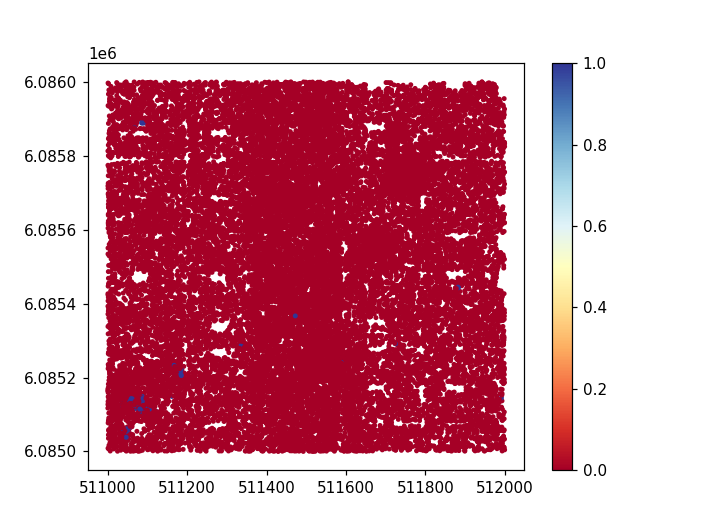

In [51]:
plt.figure()
sc = plt.scatter(pred_data[idx, 0], pred_data[idx, 1], c =pred_data[idx, -1],
                cmap=cm, vmin=vmin, vmax=vmax, s=5
            )
plt.colorbar(sc)

In [24]:
## test with pre transformer

room_coord_scale = pre_transform['room_coord_scale']
test_sample = np.empty((0,4), float)
save_names= pre_transform['room_names'][0]
file_save = open(root_path+'/vis/' + save_names + "pre.txt",'a')

# for file in os.listdir(test_fold):
for file in glob.glob(test_fold + "*cloud*pt"):

    print(file)
    sample = os.path.join(test_fold, file)
    pt_data = torch.load(sample)
    pos_ = pt_data['points']
    pt_ori = pt_data['points'] * room_coord_scale + pt_data['coord_min']
    data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(pos_.shape[0]).long()))
    # data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(1).long()))
    data_s.y = torch.zeros(data_s.batch.shape).long()
    f = get_nearest(pos_, data_s.pos)

    with torch.no_grad():
        model_pl.set_input(data_s, "cuda")
        model_pl.forward(data_s)
    
    pre = model_pl.output.cpu().numpy()
    m= torch.nn.functional.softmax(torch.tensor(pre), dim=1)
    cla_pre = np.argmax(m, axis=1)
    pre_ori = np.arange(len(pos_))
    for i in pre_ori:
#         print(i)
        pre_ori[i] = cla_pre[f[i]]
    combine_pre = np.column_stack((pt_ori, pre_ori.T))
    import ipdb;ipdb.set_trace()
    
    np.savetxt(file_save, combine_pre, fmt = '%1.5f')
    file_save.write("\n")
# #     test_sample = np.append(combine_pre, test_sample, axis = 0)
    

/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU/Powerlines/exp_2205/denmark/processed/test_0_(0.1, 0.1)/PUNKTSKY_00005_1km_6085_511_cloud_393.pt


ValueError: operands could not be broadcast together with shapes (129389,3) (5,3) 

In [285]:
onesample = test_folder + "PUNKTSKY_00005_1km_6090_507_cloud_194.pt"
onesample = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU/Powerlines/test_some/denmark/processed/test_0_(0.05, 0.05)/PUNKTSKY_00005_1km_6090_507_cloud_335.pt"
pt_data = torch.load(onesample)

In [286]:
pt_data['points'].shape, pt_data['points']
pt_data

{'filename': 'PUNKTSKY_00005_1km_6090_507',
 'coord_min': array([5.07e+05, 6.09e+06, 4.55e+00]),
 'coord_max': array([5.0800e+05, 6.0910e+06, 1.2688e+02]),
 'points': array([[16.0878    , 15.8918    ,  0.14943186],
        [16.0878    , 15.8908    ,  0.13880487],
        [16.0756    , 15.8914    ,  0.14567154],
        ...,
        [16.4654    , 15.8886    ,  0.10120167],
        [16.4538    , 15.8886    ,  0.10095643],
        [16.4474    , 15.8886    ,  0.10111992]]),
 'labels': array([0., 0., 0., ..., 0., 0., 0.]),
 'room_idx': 0,
 'part_i': 16,
 'part_j': 15}

In [287]:
pos_ = pt_data['points']
data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(pos_.shape[0]).long()))
# data_s = transform_test(Batch(pos=torch.from_numpy(pos_).float(), batch=torch.zeros(1).long()))
data_s.y = torch.zeros(data_s.batch.shape).long()

In [46]:
# pos_ = pt_data['points']
# data_s = transform_test(Data(pos=torch.from_numpy(pos_).float()))

In [288]:
pos_.shape

(49155, 3)

In [289]:
data_s.coords, data_s.pos

(tensor([[406, 375,   2],
         [407, 375,   2],
         [408, 375,   2],
         ...,
         [424, 397,   5],
         [425, 397,   5],
         [425, 398,   5]], dtype=torch.int32),
 tensor([[16.2588, 15.0146,  0.1000],
         [16.2876, 15.0148,  0.1000],
         [16.3024, 15.0014,  0.1000],
         ...,
         [16.9750, 15.8874,  0.1852],
         [16.9840, 15.8812,  0.1876],
         [16.9890, 15.9052,  0.1816]]))

In [290]:
data_s

Batch(batch=[1232], coords=[1232, 3], grid_size=[1], pos=[1232, 3], x=[1232, 1], y=[1232])

In [264]:
index = torch.arange(len(data_s.pos))
l = data_s.pos[[0]].isclose(torch.tensor(pos_, dtype=torch.float)).all(1)
j = data_s.pos[[0]].isclose(torch.tensor(pos_, dtype=torch.float)).sum()
l, len(l), j
# index


(tensor([False, False, False,  ..., False, False, False]), 43330, tensor(2126))

In [335]:
f = get_nearest(pos_, data_s.pos)
f.shape, f
f.max(), data_s.pos.shape

(1776, torch.Size([1777, 3]))

In [155]:
## nn
# index = torch.arange(len(data_s.pos))
# for i in torch.arange(len(data_s.pos)):
#     print(i)
#     index(data_s.pos[[i]].isclose(torch.tensor(pos_, dtype=torch.float)).all(1))

tensor(0)


TypeError: 'Tensor' object is not callable

In [292]:
with torch.no_grad():
    model_pl.set_input(data_s, "cuda")
    model_pl.forward(data_s)

In [336]:
pre = model_pl.output.cpu().numpy()
pre.shape

(1232, 2)

In [294]:
m= torch.nn.functional.softmax(torch.tensor(pre), dim=1)
m

tensor([[9.1384e-01, 8.6159e-02],
        [9.9324e-01, 6.7609e-03],
        [1.0000e+00, 2.0969e-08],
        ...,
        [1.0000e+00, 3.2320e-11],
        [1.0000e+00, 2.0318e-12],
        [1.0000e+00, 7.6776e-11]])

In [295]:
cla_pre = np.argmax(m, axis=1)
cla_pre.shape, cla_pre

(torch.Size([1232]), tensor([0, 0, 0,  ..., 0, 0, 0]))

In [298]:
pre_ori = np.arange(len(pos_))
for i in pre_ori:
#     print(i)
    pre_ori[i] = cla_pre[f[i]]

In [273]:
room_coord_scale = np.array([ 50.  ,  50.  , 156.46])

In [300]:
# room_scale = pt_data['coord_max'] - pt_data['coord_min']
pt_ori = pt_data['points'] * room_coord_scale + pt_data['coord_min']

In [325]:
combine_pre = np.column_stack((pt_ori, pre_ori.T))
combine_pre.shape

(49155, 4)

In [322]:
pre_ori.size
combine_pre = np.concatenate((pt_ori, pre_ori.T))
# combine_pre = np.stack((pt_ori, pre_ori), )

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [312]:
pt_ori

array([[5.07804390e+05, 6.09079459e+06, 2.79301095e+01],
       [5.07804390e+05, 6.09079454e+06, 2.62674103e+01],
       [5.07803780e+05, 6.09079457e+06, 2.73417698e+01],
       ...,
       [5.07823270e+05, 6.09079443e+06, 2.03840129e+01],
       [5.07822690e+05, 6.09079443e+06, 2.03456429e+01],
       [5.07822370e+05, 6.09079443e+06, 2.03712229e+01]])

In [85]:
print(cross_entropy_error(pre, data_s.y ))

/tmp/ipykernel_1644453/3522414059.py:3: RuntimeWarning: invalid value encountered in log
  return -np.sum(t*np.log(y+delta))


ValueError: operands could not be broadcast together with shapes (961,) (961,2) 

In [ ]:
## data process for test
test_set = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_one/denmark/raw/test/"

def read_process_test(test_set):
    

In [16]:
processed_split_folder = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_for_exp_allClasses/denmark/processed/"
processed_split_folder = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_one/denmark/processed/"

processed_split_folder = "/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU/Powerlines/test_some/denmark/processed"

test_fold = processed_split_folder + "test_0_(0.05, 0.05)/"
processed_file_names = list(Path(test_fold).glob("*cloud_*.pt"))
len(processed_file_names)



0

In [56]:
!ls /home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_one/denmark/processed/

 pre_filter.pt	   'test_0_(0.05, 0.05)'      'val_0_(0.05, 0.05)'
 pre_transform.pt  'train_0.25_(0.05, 0.05)'


In [53]:
for i in processed_file_names[0:3]:
    cloud = torch.load(i)
cloud

{'filename': '1km_6238_575_edited_copy',
 'coord_min': array([5.7500e+05, 6.2380e+06, 8.1846e+01]),
 'coord_max': array([5.75999999e+05, 6.23900000e+06, 1.58266000e+02]),
 'points': array([[14.2007742 ,  3.36808337,  0.41931432],
        [14.61049461,  3.25900326,  0.40967024],
        [14.38525439,  3.32896333,  0.41523161],
        ...,
        [14.71429471,  3.81070381,  0.41589898],
        [14.19049419,  3.77554378,  0.42070139],
        [14.18535419,  3.84862385,  0.4207799 ]]),
 'labels': array([0., 0., 0., ..., 0., 0., 0.]),
 'room_idx': 1,
 'part_i': 14,
 'part_j': 3}

In [26]:
model_path = "./outputs/2022-02-16/11-00-40/PointNet_old.pt"
model = torch.load(model_path)
model

{'model_props': {'num_epochs': 26,
  'num_batches': 113672,
  'num_samples': 227343},
 'run_config': {'job_name': 'benchmark',
  'models': {'defaults': ['segmentation/default'],
   'PointNet': {'class': 'pointnet.PointNet',
    'conv_type': 'PARTIAL_DENSE',
    'input_nc': 'FEAT + 3',
    'input_stn': {'local_nn': [64, 128, 1024], 'global_nn': [1024, 512, 256]},
    'local_nn_1': [64, 64],
    'feat_stn': {'k': 64,
     'local_nn': [64, 64, 128, 1024],
     'global_nn': [1024, 512, 256]},
    'local_nn_2': [64, 64, 128, 1024],
    'seg_nn': ['1024 + 64', 512, 256, 128, 'N_CLS']},
   'PointNet_Features': {'class': 'pointnet.SegPointNetModel',
    'conv_type': 'PARTIAL_DENSE',
    'pointnet': {'local_nn': [3, 32, 64, 4],
     'global_nn': [4, 2],
     'aggr': 'mean',
     'return_local_out': True},
    'seg_nn': ['4 + 2', 50, 'N_CLS']}},
  'model_name': 'PointNet',
  'update_lr_scheduler_on': 'on_epoch',
  'selection_stage': '',
  'pretty_print': False,
  'eval_frequency': 1,
  'tracker_

In [57]:
model?

In [47]:
model['run_config']['data']['dataroot'] = '/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_one/'
torch.save(model, "./outputs/2022-02-16/11-00-40/PointNet_modified.pt")

In [48]:
model['run_config']['data']

'/home/dmn774/data/Deep1/SegmentationDenmark/Lidar_tiles_KU_one/'

In [25]:
for i in processed_file_names[0:3]:
    cloud = torch.load(i)
cloud
    


{'points': array([[ 1.20255320e+01,  7.48238748e+00, -9.74511817e-03],
        [ 1.22360322e+01,  7.20088720e+00, -7.30265517e-03],
        [ 1.22408522e+01,  7.29888730e+00, -8.94745304e-03],
        ...,
        [ 1.26918327e+01,  7.72264772e+00, -9.76985197e-03],
        [ 1.29056329e+01,  7.91432791e+00, -7.90244988e-03],
        [ 1.25174725e+01,  7.89886790e+00, -8.29200727e-03]]),
 'labels': array([0., 0., 0., ..., 0., 0., 0.]),
 'room_idx': 2,
 'part_i': 12,
 'part_j': 7}

In [10]:
#!python eval.py  model_name=PointNet checkpoint_dir=/home/dmn774/code/git/seg/torch-3dpoints/outputs/2022-02-16/11-00-40/ batch_size=2 num_workers=4 eval_stages=["val"]

num_workers: 4
batch_size: 2
cuda: 0
weight_name: latest
enable_cudnn: true
checkpoint_dir: /home/dmn774/code/git/seg/torch-3dpoints/outputs/2022-02-16/11-00-40/
model_name: PointNet
precompute_multi_scale: false
enable_dropout: false
voting_runs: 1
eval_stages:
- val
pretty_print: true
tracker_options:
  full_res: false
  make_submission: true
visualization:
  activate: true
  format:
  - pointcloud
  - tensorboard
  - predictions
  num_samples_per_epoch: -1
  deterministic: true
  saved_keys:
    pos:
    - - x
      - float
    - - 'y'
      - float
    - - z
      - float
    'y':
    - - l
      - float
    pred:
    - - p
      - float
  ply_format: binary_big_endian
  tensorboard_mesh:
    label: 'y'
    prediction: pred

[2022-02-16 20:52:05,187][torch_points3d.trainer][INFO] - DEVICE : cuda
[2022-02-16 20:52:05,807][torch_points3d.metrics.model_checkpoint][INFO] - Loading checkpoint from /home/dmn774/code/git/seg/torch-3dpoints/outputs/2022-02-16/11-00-40/PointNet.pt
loading p

  0%|                                                   | 0/400 [00:02<?, ?it/s]
Traceback (most recent call last):
  File "eval.py", line 16, in main
    trainer.eval(stage_name=stage)
  File "/maps/projects/dereeco/people/dmn774/git/seg/torch-3dpoints/torch_points3d/trainer.py", line 170, in eval
    self._test_epoch(epoch, "val")
  File "/maps/projects/dereeco/people/dmn774/git/seg/torch-3dpoints/torch_points3d/trainer.py", line 262, in _test_epoch
    self._model.forward(epoch=epoch)
  File "/maps/projects/dereeco/people/dmn774/git/seg/torch-3dpoints/torch_points3d/models/segmentation/pointnet.py", line 52, in forward
    x = self.pointnet_seg(self.input_features, self.input.batch)
  File "/projects/dereeco/apps/miniconda3/envs/points/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1102, in _call_impl
    return forward_call(*input, **kwargs)
  File "/maps/projects/dereeco/people/dmn774/git/seg/torch-3dpoints/torch_points3d/modules/PointNet/modules.py", line 99, in fo